<a href="https://colab.research.google.com/github/swagata025/Learning-pytorch-and-DL/blob/main/learning_ANN_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
import matplotlib.pyplot as plt
#making a synthetic dataset for binary classification problem
torch.manual_seed(42)
zero_f = torch.randn(50,2) + (2)
one_f = torch.randn(50,2) + (-2)
zero = torch.zeros(50,1)
one = torch.ones(50,1)
X = torch.cat([zero_f,one_f])
Y = torch.cat([zero,one])
# X.requires_grad_()
X.shape
Y.shape

torch.Size([100, 1])

In [3]:
print(X.shape)
print(Y.shape)


torch.Size([100, 2])
torch.Size([100, 1])


In [4]:
Y.squeeze().shape


torch.Size([100])

Plotting the graph - scatterplot

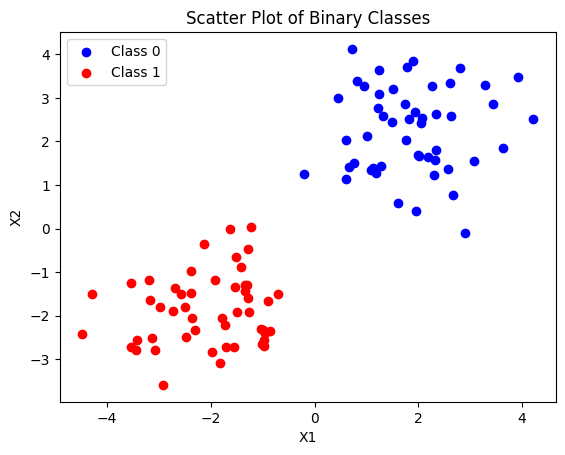

In [5]:
#plotting a scatterplot of binary classes,
Y = Y.squeeze()  # Ensures Y is (100,)
plt.scatter(X[Y==0][:, 0], X[Y==0][:, 1], color='blue', label='Class 0')
plt.scatter(X[Y==1][:, 0], X[Y==1][:, 1], color='red', label='Class 1')
plt.legend()
plt.title("Scatter Plot of Binary Classes")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


building manual neural network - forward propagation

In [6]:
import torch

W1 = torch.randn(2, 4, requires_grad=True)  # Input to first hidden layer
b1 = torch.randn(4, requires_grad=True)

W2 = torch.randn(4, 3, requires_grad=True)  # First hidden to second hidden
b2 = torch.randn(3, requires_grad=True)

W3 = torch.randn(3, 1, requires_grad=True)  # Second hidden to output
b3 = torch.randn(1, requires_grad=True)

def predict(W1,W2,W3,b1,b2,b3):
  z1   = X @ W1 + b1               # (100,4)
  a1   = torch.relu(z1)            # (100,4)

  z2   = a1 @ W2 + b2              # (100,3)
  a2   = torch.relu(z2)            # (100,3)

  z3   = a2 @ W3 + b3              # (100,1)
  y_pred = torch.sigmoid(z3)       # (100,1)
  return y_pred





Calculating binary cross entropy

In [7]:
def cost(Y,y_pred):
  y_pred = predict(W1,W2,W3,b1,b2,b3)
  loss = -((Y * torch.log(y_pred)) + (1 - Y) * torch.log(1 - y_pred))
  bce = torch.mean(loss)
  return bce



# import torch
# import torch.nn as nn

# # Assume y_pred is already passed through sigmoid
# bce_loss_fn = nn.BCELoss()

# # Example: y_pred and Y are both (100, 1)
# loss = bce_loss_fn(y_pred, Y)
# print("BCE Loss:", loss.item())


Updating parameters - Backward propagation

In [10]:
def update_weights(params, lr=0.01):
    y_pred = predict(W1,W2,W3,b1,b2,b3)
    bce = cost(Y,y_pred)
    bce.backward()
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad
    return params


def zero_gradients(params):
    for param in params:
        param.grad.zero_()


Training

In [12]:
params = [W1, W2, W3, b1, b2, b3]
resultant_cost = []
epochs = 500
for i in range(epochs):
  y_pred = predict(W1,W2,W3,b1,b2,b3)
  params = update_weights(params)
  # print(params)
  zero_gradients(params)
  if (i%100==0):
    resultant_cost.append(cost(Y,y_pred))
print(resultant_cost)

[tensor(0.7160, grad_fn=<MeanBackward0>), tensor(0.7113, grad_fn=<MeanBackward0>), tensor(0.7091, grad_fn=<MeanBackward0>), tensor(0.7076, grad_fn=<MeanBackward0>), tensor(0.7063, grad_fn=<MeanBackward0>)]
